# Initialising and visualising the $\ket{0}$ state on the Bloch sphere

## Learning goals

### By the end of this lesson, students should:

* Be comfortable creating and running a QuantumCircuit

* Understand qubit states via statevectors

* Visualize states on the Bloch sphere

* Apply common single-qubit gates

* Measure outcomes using Aer simulator

* See how results differ (and don’t) on real hardware

## 0.1 Imports

In [3]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization.bloch import Bloch

## 0.2 Helper functions

In [4]:
# Helper function to convert 1-qubit statevector to Bloch vector
def statevector_to_bloch(statevec):
    alpha = statevec[0]
    beta = statevec[1]
    x = 2 * (alpha.conjugate() * beta).real
    y = 2 * (alpha.conjugate() * beta).imag
    z = abs(alpha)**2 - abs(beta)**2
    return [x, y, z]

# Canonical Bloch vectors for common single-qubit states
BLOCH_STATE_LABELS = {
    "|+⟩":  [1, 0,  0],
    "|i⟩":  [0, 1,  0],
}

def plot_bloch_states(vectors, labels=None, colors=None, show_named_states=True):
    b = Bloch()

    for v in vectors:
        b.add_vectors(v)

    if colors:
        b.vector_color = colors

    if labels:
        for v, label in zip(vectors, labels):
            b.add_annotation(v, label)

    if show_named_states:
        for label, vec in BLOCH_STATE_LABELS.items():
            b.add_annotation(vec, label)
    

    b.show()

## 1. Single qubits

Statevector |0⟩: [1.+0.j 0.+0.j]


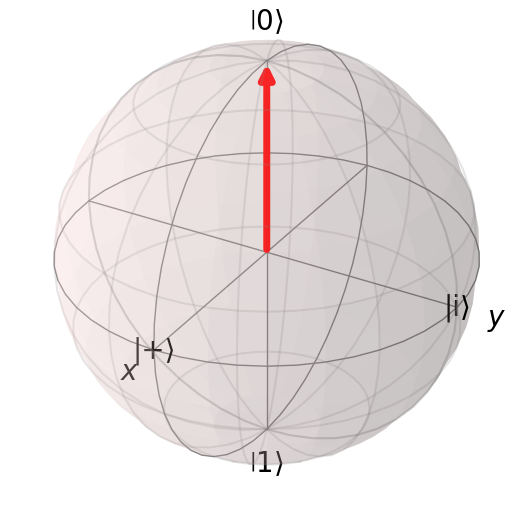

In [5]:
# |0⟩ state
state_0 = Statevector.from_label('0')
print("Statevector |0⟩:", state_0.data)

bloch_0 = statevector_to_bloch(state_0.data)
plot_bloch_states([bloch_0], colors=["r"])

## 2. Evolving a state with a quantum circuit

Initial statevector: [1.+0.j 0.+0.j]
Final statevector: [0.+0.j 1.+0.j]


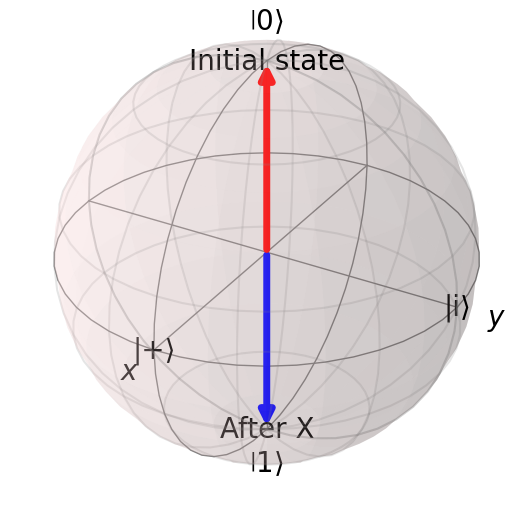

In [6]:
# 1. Define initial state
initial_state = Statevector.from_label('0')

# 2. Build circuit
qc = QuantumCircuit(1)
qc.x(0)

# 3. Evolve state
final_state = initial_state.evolve(qc)

# 4. Print statevectors
print("Initial statevector:", initial_state.data)
print("Final statevector:", final_state.data)

# 5. Plot Bloch vectors
plot_bloch_states(
    [
        statevector_to_bloch(initial_state.data),
        statevector_to_bloch(final_state.data)
    ],
    labels=["Initial state", "After X"],
    colors=["r", "b"]
)

## 2.1 H Gate

Initial statevector: [1.+0.j 0.+0.j]
Final statevector: [0.70710678+0.j 0.70710678+0.j]


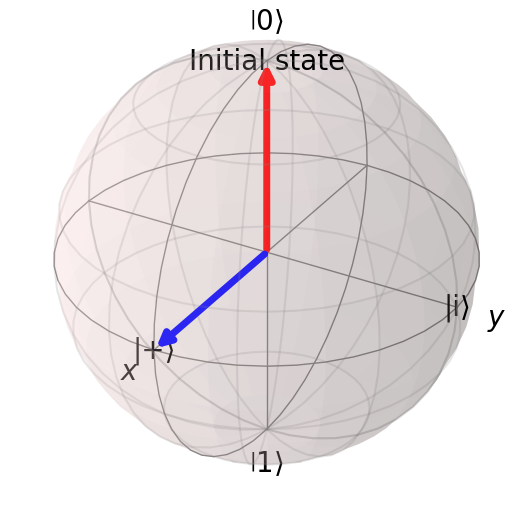

In [8]:
# 1. Define initial state
initial_state = Statevector.from_label('0')
initial_state = Statevector([1,0])

# 2. Build circuit
qc = QuantumCircuit(1)
qc.h(0)

# 3. Evolve state
final_state = initial_state.evolve(qc)

# 4. Print statevectors
print("Initial statevector:", initial_state.data)
print("Final statevector:", final_state.data)

# 5. Plot Bloch vectors
plot_bloch_states(
    [
        statevector_to_bloch(initial_state.data),
        statevector_to_bloch(final_state.data)
    ],
    labels=["Initial state"],
    colors=["r", "b"]
)

## Exercise

### What other single qubit gates do you know? Apply them to the $\ket{0}$ state and see what happens.
### What about starting from a different initial state? E.g. $\ket{+}$
### initial_state = Statevector([x, y]) 
### Don't forget to normalise your initial state $|x|^2+|y|^2 = 1$

# 3. Measurement 

### Up to now, we’ve been working with the statevector, which describes a quantum state before measurement.
### Measurement is different:

* It is probabilistic

* It destroys the statevector description

* We only learn something by repeating the experiment

In [9]:
initial_state = Statevector.from_label("0")

qc = QuantumCircuit(1)
qc.h(0)

state = initial_state.evolve(qc)

print("Statevector:")
print(state.data)

print("\nMeasurement probabilities:")
print(state.probabilities_dict())

Statevector:
[0.70710678+0.j 0.70710678+0.j]

Measurement probabilities:
{np.str_('0'): np.float64(0.4999999999999999), np.str_('1'): np.float64(0.4999999999999999)}


{'1': 503, '0': 521}


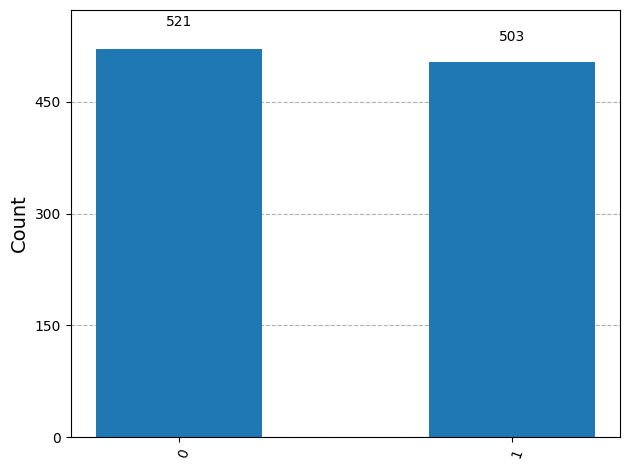

In [10]:
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

# 1. Initialise circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1, 1)

# 2. Apply H gate
qc.h(0)

# 3. Measure qubit 0 into cbit 0
qc.measure(0, 0) # Try measuring without the cbit and see what happens

# 4. Transpile the circuit for the simulator
sim = AerSimulator()
compiled_circuit = transpile(qc, sim)
# NB this is actually a superfluous step when using the AerSimulator
# but a crucial one when using real hardware

# 5. Run the circuit on the (virtual) hardware
job = sim.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

## Exercise:
### What happens if you run the cell above again? What if you mess around with the number of shots? What if you remove the Hadamard gate?

# 4. Real hardware

In [76]:
from qiskit_ibm_runtime import QiskitRuntimeService

# 1. Initialise and build circuit
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

# 2. Select backend
service = QiskitRuntimeService(
    channel="ibm_cloud",
    token="YOUR_API_TOKEN_HERE"
)
backend = service.least_busy(simulator=True)

# 3. Transpile (this step is now crucial - do you know why?)
qc_transpiled = transpile(qc, backend)

# 4. Run circuit
job = backend.run(qc_transpiled, shots=64)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

qiskit_runtime_service._discover_account:WARNING:2026-02-04 17:00:21,325: Loading account with the given token. A saved account will not be used.


InvalidAccountError: 'Unable to retrieve instances. Please check that you are using a valid API token.'

# Appendix

In [9]:
import numpy as np

# Single-qubit gates
I = np.array([[1, 0],
              [0, 1]])

X = np.array([[0, 1],
              [1, 0]])

Y = np.array([[0, -1j],
              [1j, 0]])

Z = np.array([[1, 0],
              [0, -1]])

# Define states
zero = np.array([[1], [0]])
one = np.array([[0], [1]])

print("Zero Vector: \n", zero)
print("\nApplying X = \n", X)
# Apply X to |0>
result = X @ zero

print("\nResult:\n", result)

Zero Vector: 
 [[1]
 [0]]

Applying X = 
 [[0 1]
 [1 0]]

Result:
 [[0]
 [1]]


# Example of observables

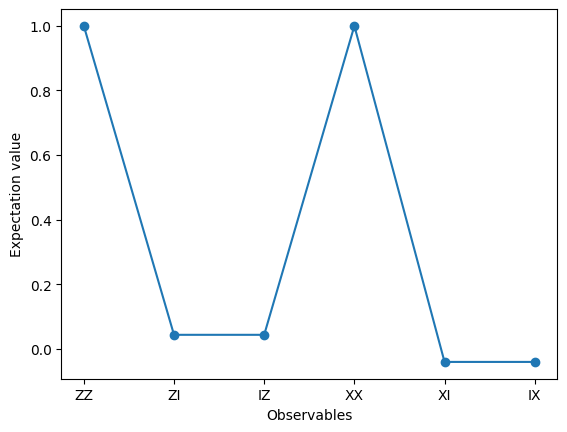

In [10]:

from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli
from qiskit_aer.primitives import Estimator
import matplotlib.pyplot as plt

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')
observables = [ZZ, ZI, IZ, XX, XI, IX]

estimator = Estimator()
job = estimator.run([qc] * len(observables), observables)

data = [ 'ZZ','ZI','IZ','XX','XI','IX']
values = job.result().values
plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()

# Visualise quantum circuits

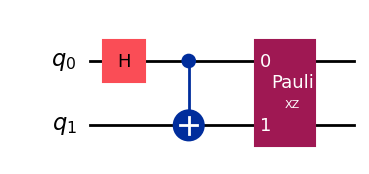

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli
from qiskit.qasm2 import dumps
from qiskit.circuit.library import PauliGate

qc = QuantumCircuit(2)
qc.h(0) # Hadamard on qubit 0
qc.cx(0, 1)# CNOT (control=0, target=1)

# 'XZ' means: Z acts on qubit 0, X acts on qubit 1
pauli_gate = PauliGate("XZ")
qc.append(pauli_gate, [0,1])
qc.draw(output='mpl')

In [2]:
# Define a 3-qubit Pauli operator: X ⊗ I (tensor product)
P = Pauli("XI")

print("Matrix form:\n", P.to_matrix())

Matrix form:
 [[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


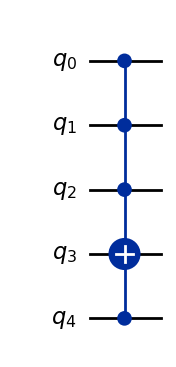

In [3]:
from qiskit.circuit.library import MCXGate
mcx = MCXGate(4)
 
from qiskit import QuantumCircuit
circuit = QuantumCircuit(5)
circuit.append(mcx, [0, 1, 4, 2, 3])
circuit.draw("mpl")

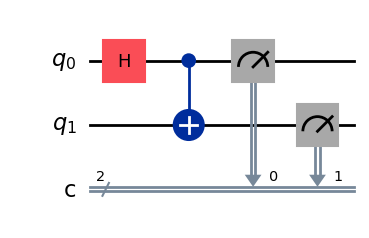

In [4]:
from qiskit import QuantumCircuit
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2,2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Measure both qubits
qc.measure([0, 1], [0, 1]) 
 
# Return a text drawing of the circuit.
qc.draw(output="mpl")

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Create a quantum circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.measure(0, 0)

# Use AerSimulator
sim = AerSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, sim)

# Run the simulation
result = sim.run(compiled_circuit).result()

# Extract measurement counts
counts = result.get_counts(compiled_circuit)
print(counts)

{'1': 1024}


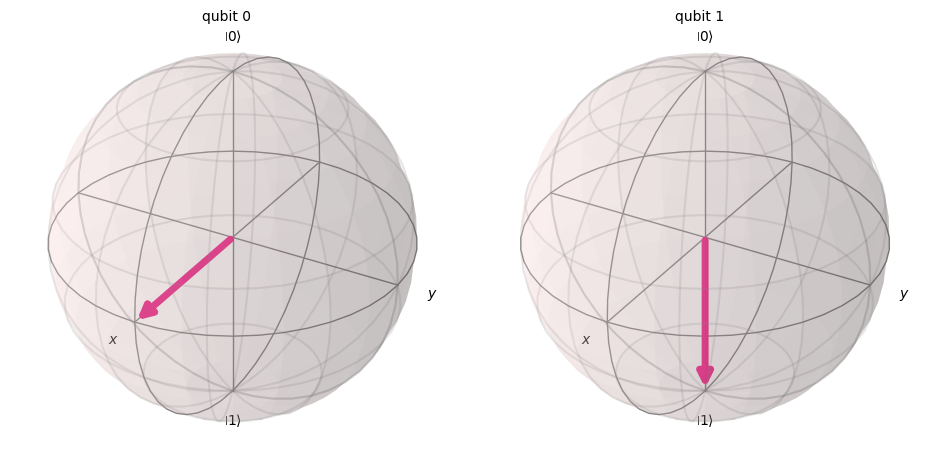

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
 
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
 
state = Statevector(qc)
plot_bloch_multivector(state)